<a href="https://colab.research.google.com/github/reneSalmon/Google_TensorFlow_Certificate/blob/master/TensorFlow_Exam_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1: TF.Basics


## 1 Quickstart for Beginners

1. Load a prebuild dataset
2. Build neural network that classifies images
3. Train neural network
4. Evaluat accuracy of model

In [6]:
#Setup
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [7]:
# 1 Load dataset
minst = tf.keras.datasets.mnist #load dataset of 70.000 handwriting digits for image classification
(x_train, y_train), (x_test, y_test) = minst.load_data() #split dataset x = images, y = image labels
x_train, x_test = x_train / 255.0, x_test / 255.0 #normalize dataset

11501568/11490434 [==============================] - 0s 0us/step


5
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.  

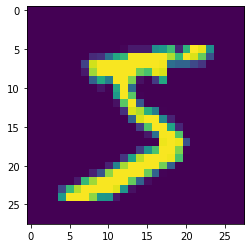

In [8]:
#view data
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])

In [9]:
# 2 Build machine learning model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [10]:
# 3 For each example, the model returns a vector of logits or log-odds scores, one for each class.
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.08420402,  0.05257533,  0.7750828 ,  0.13177018, -0.36723143,  0.34245336,  0.04734165,  0.18702422, -0.55256885,  0.01669562]], dtype=float32)

In [11]:
# 4 The tf.nn.softmax function converts these logits to probabilities for each class
tf.nn.softmax(predictions).numpy()

array([[0.08183906, 0.09383464, 0.19326098, 0.10156804, 0.06166567, 0.12538789, 0.09334482, 0.10733802, 0.0512333 , 0.09052756]], dtype=float32)

In [12]:
# 5 Define a loss function for training using losses.SparseCategoricalCrossentropy,
# which takes a vector of logits and a True index and returns a scalar loss for each example.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
# 6 This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.
# This untrained model gives probabilities close to random (1/10 for each class), 
# so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.
loss_fn(y_train[:1], predictions).numpy()

2.0763433

In [14]:
# 7 Configure and compile the model 
model.compile(optimizer="adam",
              loss=loss_fn,
              metrics=["accuracy"])

### Train and evaluate the model


In [15]:
# 1 Adjust model parameters and minimize loss
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2896 - accuracy: 0.9166
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1397 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1047 - accuracy: 0.9690
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0861 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0733 - accuracy: 0.9772


In [16]:
# 2 Check the model performance 
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0706 - accuracy: 0.9780 - 743ms/epoch - 2ms/step


[0.07062876224517822, 0.9779999852180481]

In [17]:
# => Image classifier accuracy ~98% on this dataset

In [18]:
# 3 Return probability of the matching for a specific test
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [19]:
results = probability_model(x_test[:5])
results

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.05880503e-07, 3.14974038e-08, 1.11400905e-05, 1.59035641e-04, 2.12891615e-09, 1.36830170e-06, 3.07337245e-13, 9.99823034e-01, 1.72061186e-06, 3.67776920e-06],
       [9.80112169e-09, 1.78456743e-04, 9.99809444e-01, 1.18457783e-05, 7.37922039e-13, 2.35813133e-07, 4.98748385e-08, 7.38390401e-14, 1.45737715e-08, 3.61749747e-14],
       [2.97374697e-07, 9.98688281e-01, 4.40564763e-05, 6.02909540e-06, 7.85946831e-05, 3.28993679e-07, 6.94351093e-06, 1.10241654e-03, 7.24806014e-05, 4.58989888e-07],
       [9.99060333e-01, 1.59543099e-08, 5.42044290e-04, 1.40105965e-06, 1.07855185e-05, 4.26439692e-05, 3.04801826e-04, 6.22704192e-06, 8.29306259e-08, 3.16035657e-05],
       [3.75721447e-06, 1.36673661e-09, 2.80348604e-06, 4.09558876e-09, 9.98954415e-01, 1.08862662e-06, 6.01494976e-05, 3.00818774e-05, 1.24983887e-06, 9.46251093e-04]], dtype=float32)>

In [20]:
rounded_resultst = tf.math.round(results)
rounded_resultst

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [21]:
#Suggestion for results = [7, 2, 1, 0, 4]
# How to show the results in numbers automatically?
# How to compare the results?
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## 2 Exercise

In [22]:
from tensorflow import keras 
import numpy as np

In [23]:
# 1 Define and compile neural network
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])]) # 1 layer / 1 neuron

In [24]:
# 2 Compile NN with 2 functions: Loss and optimizer
model.compile(optimizer="sgd", loss="mean_squared_error")

In [25]:
# 3 Providing data
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [26]:
# 4 Training NN
model.fit(xs, ys, epochs=500)
print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 0s 288ms/step - loss: 35.2771
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 28.0898
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 22.4283
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 17.9674
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 14.4511
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 11.6782
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 9.4903
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 7.7627
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 6.3975
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 5.3174
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 4.4618
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 3.7829
Epoch 13/500
1/1 [==============================] -

## 3 Exercise

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [27]:
# GRADED FUNCTION: house_model
def house_model(y_new):
    x = np.array([1.0, 2.0, 3.0, 4.0, 5.0 , 6.0], dtype=float)
    y = np.array([100.0, 150.0, 200.0, 250.0, 300.0, 350.0], dtype=float)
    model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model.compile(optimizer="SGD", loss="mse")
    model.fit(x,y, epochs=500)
    return model.predict(y_new)[0]

In [28]:
prediction = house_model([7])
print(prediction)

Epoch 1/500
1/1 [==============================] - 1s 707ms/step - loss: 59849.0664
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 27832.9043
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 13013.8955
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 6154.2544
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 2978.4514
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 1507.6461
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 825.9727
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 509.5399
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 362.1578
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 293.0248
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - loss: 260.1143
Epoch 12/500
1/1 [==============================] - 0s 13ms/step - loss: 243.9752
Epoch 13/500
1/1 [

## 4 Excerise

In [29]:
#Load fashion dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

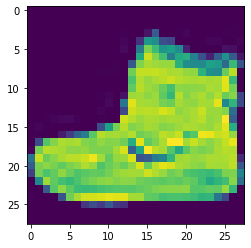

In [30]:
#view data
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [31]:
#Normalize data 
training_images = training_images/255
test_images = test_images/255

In [32]:
from matplotlib.cbook import flatten
#Design model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation="relu"),
                                   tf.keras.layers.Dense(10, activation="softmax")])

In [33]:
model.compile(optimizer="adam",
              loss= "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4993 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3774 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3373 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3122 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.8906


In [34]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3549 - accuracy: 0.8730


[0.3548794090747833, 0.8730000257492065]

In [35]:
classifications = model.predict(test_images)
print(tf.math.round(classifications[:5]))

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)


In [36]:
# Prediction [9,2,1,1,6]
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [37]:
#Outmate classification
output = tf.gather(tf.math.round(classifications[:5]), 0)
output

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [38]:
class_nine = tf.constant([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])
class_nine

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [39]:
# def classification_automation(output):
#   if output ==  np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32):
#     print("class 09") 
# => If statements do not work for tensorflow

In [40]:
a = tf.math.equal(class_nine, output)
a

<tf.Tensor: shape=(10,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True])>

In [41]:
class_eight = tf.constant([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
b = tf.math.equal(class_eight, output)
b

<tf.Tensor: shape=(10,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True, False, False])>

In [42]:
print(a.numpy()) #=> correct class
print(b.numpy()) #=> wrong class

[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True False False]


## 5 Ex

In [43]:
#Now test with 512 neurons
#What different results do you get for loss, training time etc? 
#Why do you think that's the case?

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(512, activation="relu"),
                          tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classification = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4771 - accuracy: 0.8302
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3599 - accuracy: 0.8686
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3221 - accuracy: 0.8816
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2984 - accuracy: 0.8897
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8781


In [44]:
print(tf.math.round(classifications[0],0))
print(test_labels[0])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)
9


In [45]:
#Hypothesis: Double the amount of neurons will increase accuracy
#But processing will take more time 

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(1024, activation="relu"),
                          tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classification = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4712 - accuracy: 0.8321
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3583 - accuracy: 0.8682
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3226 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2969 - accuracy: 0.8901
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.3326 - accuracy: 0.8821


In [46]:
# Result: Training takes longer and accuracy is increased from 0.8656 to 0.8757
print(tf.math.round(classifications[0],0))
print(test_labels[0])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)
9


## 6 Ex

In [47]:
#What would happen if you remove the Flatten() layer. Why do you think that's the case?

#=> Error: Because shape of data. 
#RoT = First Layer should be in same shape as input data 
#With Flatten we create of out 28x28 matrix an array of 784X1


## 7 Ex

In [48]:
#Consider the final (output) layers. Why are there 10 of them? 
#What would happen if you had a different amount than 10? For example, try training the network with 5.

#=>

## 8 Ex

In [49]:
#Consider the effects of additional layers in the network. 
#What will happen if you add another layer between the one with 512 and the final layer with 10.

#=>

## 9 Ex

In [50]:
#Consider the impact of training for more or less epochs. Why do you think that would be the case?

#=>


## 10 Ex

In [51]:
#Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. 
#What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

#=>



## 11 Ex

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [68]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("acc") > 0.9):
      print("\nReached 85% of accuracy so cancelling training!")
      self.model.stop_training = True
  
callbacks = myCallback()

#Create Dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255
test_images = test_images/255

#Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="acc")
model.fit(training_images, training_labels, epochs=8, callbacks=[callbacks])

Epoch 1/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4723 - acc: 0.8309
Epoch 2/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3558 - acc: 0.8694
Epoch 3/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3221 - acc: 0.8808
Epoch 4/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2991 - acc: 0.8889
Epoch 5/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2798 - acc: 0.8952
Epoch 6/8
1873/1875 [============================>.] - ETA: 0s - loss: 0.2652 - acc: 0.9011
Reached 85% of accuracy so cancelling training!
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2651 - acc: 0.9012


In [69]:
#Performance evaluation
model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)
print(tf.math.round(predictions[:5]))
print(test_labels[:5])

313/313 [==============================] - 1s 3ms/step - loss: 0.3349 - acc: 0.8810
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)
[9 2 1 1 6]


# Day 2: TF.ComputerVision (CV)

#Day 3: TF.Natrual Language Processing (NLP)

#Day 4: TF.Time Series Forcasting